In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
from dolfin import *
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
import numpy as np
from ufl import tanh
import functions as f 
from fenics import File
import cranknicolson as cn
import bdf2 

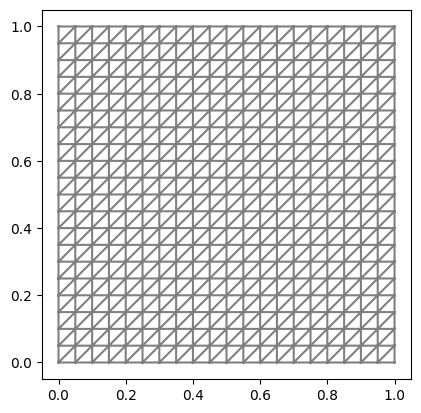

In [2]:
mesh = UnitSquareMesh(20,20)
plot(mesh)
V = FunctionSpace(mesh,'CG',2)

In [ ]:
m0 = 1e-3
dt = 0.5
T = 100
save_interval = 1
times = []#[0,7/dt,14/dt,21/dt,28/dt]
doses = []#10*np.ones_like(times)
V = FunctionSpace(mesh,"P",2)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(x[1]-s0,2)/(2*sigma*sigma))",m0 = m0,s0 = 0.5,sigma=sqrt(0.02),degree=2)
n0 = interpolate(n0,V)
c0 = interpolate(Constant(1.0), V)
path_sol = "solutions/comparison"

solver = f.Solver1D(mesh, V, n0, c0, dt, T, save_interval, times, doses, path_sol)
# solver.set_parameters({'K_m':0.005})
n_vect,c_vect,mass,csc_mass,dc_mass,tdc_mass = solver.solve()

0.6356582710208699 0.2400507721294846 0.28291611602272576 0.4778032056673864
0.6187045623563271 0.2255524622553256 0.2847405620433734 0.490517621071226
0.6558864299672258 0.25646135218777416 0.2805005782560592 0.46376471587705115
0.6656709787262749 0.26407564331691846 0.2792779959627467 0.4573535632303163


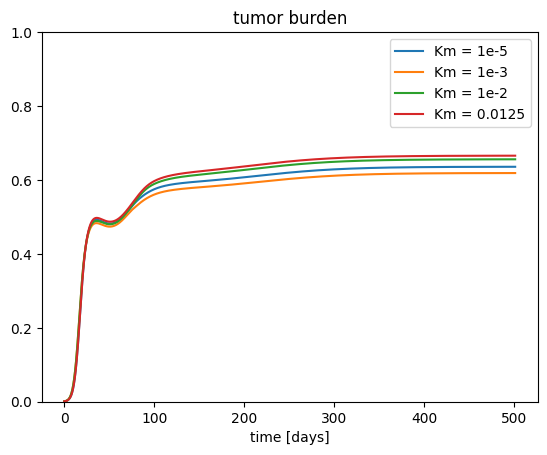

In [7]:
# tumor burden 

# mass1 = np.load('solutions/B_Km1e-3/mass.npy')
# csc1 = np.load('solutions/B_Km1e-3/csc_mass.npy')
# dc1 = np.load('solutions/B_Km1e-3/dc_mass.npy')
# tdc1 = np.load('solutions/B_Km1e-3/tdc_mass.npy')
mass1 = np.load('solutions/B_Km0.005/mass.npy')
csc1 = np.load('solutions/B_Km0.005/csc_mass.npy')
dc1 = np.load('solutions/B_Km0.005/dc_mass.npy')
tdc1 = np.load('solutions/B_Km0.005/tdc_mass.npy')

mass2 = np.load('solutions/B_Km1e-2/mass.npy')
csc2 = np.load('solutions/B_Km1e-2/csc_mass.npy')
dc2 = np.load('solutions/B_Km1e-2/dc_mass.npy')
tdc2 = np.load('solutions/B_Km1e-2/tdc_mass.npy')

mass3 = np.load('solutions/B_Km1e-3/mass.npy')
csc3 = np.load('solutions/B_Km1e-3/csc_mass.npy')
dc3 = np.load('solutions/B_Km1e-3/dc_mass.npy')
tdc3 = np.load('solutions/B_Km1e-3/tdc_mass.npy')

mass4 = np.load('solutions/B/mass.npy')
csc4 = np.load('solutions/B/cscmass.npy')
dc4 = np.load('solutions/B/dcmass.npy')
tdc4 = np.load('solutions/B/tdcmass.npy')

time1 = np.linspace(0,501,int(501/0.5))
time3 = np.linspace(0,401,int(401/0.1))
time2 = np.linspace(0,150,int(150/0.1))
time4 = np.linspace(0,501,int(501/0.1))

plt.plot(time4,mass1)
plt.plot(time1,mass3)
plt.plot(time1,mass2)
plt.plot(time4,mass4)

plt.title('tumor burden')
plt.xlabel('time [days]')
plt.ylim([0,1])
print(mass1[-1],csc1[-1],dc1[-1],tdc1[-1])

print(mass3[-1],csc3[-1],dc3[-1],tdc3[-1])
print(mass2[-1],csc2[-1],dc2[-1],tdc2[-1])
print(mass4[-1],csc4[-1],dc4[-1],tdc4[-1])
plt.legend(['Km = 1e-5','Km = 1e-3','Km = 1e-2','Km = 0.0125'])
plt.show()

(0.0, 4000.0)

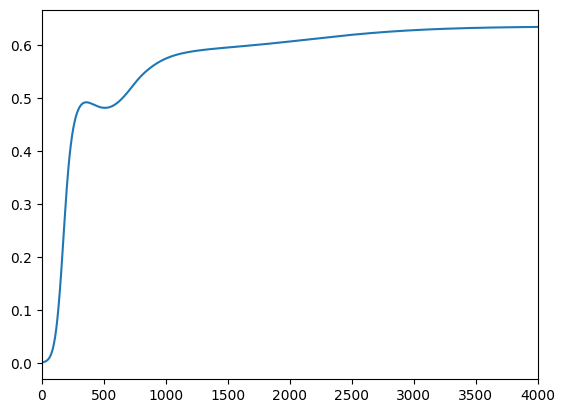

In [4]:
mass = np.load('solutions/B_Km0.005/mass.npy')
plt.plot(mass)
plt.xlim([0,4000])

0.2400507721294846 0.28291611602272576 0.4778032056673864


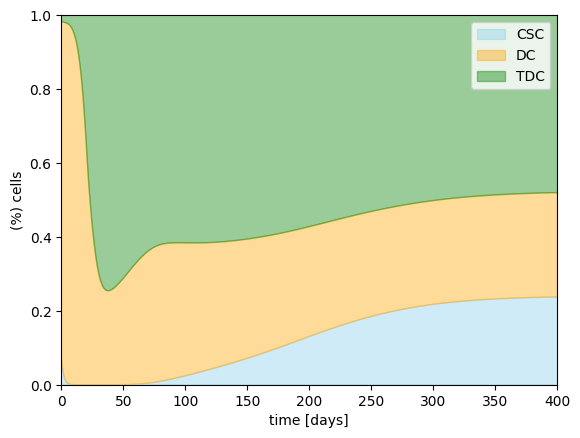

In [5]:
csc = np.load('solutions/B_Km0.005/csc_mass.npy')
dc = np.load('solutions/B_Km0.005/dc_mass.npy')
tdc = np.load('solutions/B_Km0.005/tdc_mass.npy')
#plt.plot(time01,csc)
#plt.plot(time01,csc+dc)
time=np.arange(0,501,0.1)
plt.fill_between(time, csc, color='skyblue', alpha=0.4)
plt.fill_between(time, csc+dc, csc, where=(csc+dc > csc), color='orange', alpha=0.4)
plt.fill_between(time, 1, csc+dc, where=(1 > csc+dc), color='green', alpha=0.4)
plt.ylim([0,1])
plt.xlim([0,400])
plt.ylabel('(%) cells')
plt.xlabel('time [days]')
plt.legend(['CSC','DC','TDC'])
print(csc[-1],dc[-1],tdc[-1])


In [ ]:
V = FunctionSpace(mesh,"P",2)
n1 = Function(V)
n2 = Function(V)
nfile = XDMFFile('solutions/comparison/n.xdmf')
nfile.read_checkpoint(n1,"n",1)
sol = plot(n1)

plt.colorbar(sol)
plt.title('n at time t=' )
plt.xlabel('x')
plt.ylabel('s')
plt.show()
for s in np.arange(0,1,0.05):
    print(n1(0.5,s))
# print(n1(0,0.5))

In [ ]:
c = Function(V)
mesh1D = IntervalMesh(20,0,1)
V1D = FunctionSpace(mesh1D,'CG',1)
cfile = XDMFFile('solutions/B_Km0.005/c.xdmf')

cfile.read_checkpoint(c,"c",0)
c1D = interpolate(c,V1D)
sol = plot(c1D)
plt.title('c at time: %f')# %(i*save_interval*dt) )
# plt.ylim([0,1])
plt.show()
print(c1D.vector().min())

In [ ]:
class VerticalAverage(UserExpression):
    def __init__(self, f, quad_degree, **kwargs):
        super().__init__(**kwargs)
        self.f = f
        self.points, self.weights = leggauss(quad_degree)
        self.x = 0.5*(self.points + 1)
        assert f.ufl_shape == ()
        
    def eval(self, values, x):
        values[0] = 0.5*sum(wq*self.f(x[0], xq) for xq, wq in zip(self.x, self.weights))

    def value_shape(self):
        return ()


mesh1D = IntervalMesh(20,0,1)
V1D = FunctionSpace(mesh1D,'CG',1)
n = Function(V)
nfile = XDMFFile('solutions/B_Km0.005/n.xdmf')
nfile.read_checkpoint(n,"n",500)
phi = VerticalAverage(n, quad_degree=20, degree=2)
phi_h = interpolate(phi, V1D)
plot(phi_h)
plt.ylim([0,1])
plt.xlabel('x')
plt.ylabel('phi')

In [ ]:
# cell distribution test case 1
V = FunctionSpace(mesh,"P",2)
n = Function(V)
nfile = XDMFFile('solutions/comparison/n.xdmf')
for i in range(150):
#for i in range(int(T/dt)//save_interval + 1):
    nfile.read_checkpoint(n,"n",i)
    sol = plot(n)
    plt.colorbar(sol)
    plt.title('n at time t=%f' %i)# %(i*save_interval*dt))
    plt.xlabel('x')
    plt.ylabel('s')
    plt.show()

In [ ]:
# oxygen level test case 1
c = Function(V)
mesh1D = IntervalMesh(20,0,1)
V1D = FunctionSpace(mesh1D,'CG',1)
cfile = XDMFFile('solutions/comparison/c.xdmf')
ctot = []
for i in range(100):
    cfile.read_checkpoint(c,"c",i)
    c1D = interpolate(c,V1D)
    sol = plot(c1D)
    plt.title('c at time: %f' %i)# %(i*save_interval*dt) )
    #plt.ylim([0,1])
    plt.show()
    ctot.append(assemble(c*dx))
# plt.plot(ctot)

### Radiotherapy

In [ ]:
# Radiotherapy
dt = 0.5
T = 150
save_interval = 2
c0file = XDMFFile('solutions/B_Km1e-2/c.xdmf')
n0file = XDMFFile('solutions/B_Km1e-2/n.xdmf')
V = FunctionSpace(mesh,"P",2)
c0 = Function(V)
n0 = Function(V)
c0file.read_checkpoint(c0,"c",100)
n0file.read_checkpoint(n0,"n",100)
times = [0,1,2,3,4,7,8,9,10,11,14,15,16,17,18,21,22,23,24,25,28,29,30,31,32]
doses = 2*np.ones_like(times)
# times = [0,7,14,21,28]
# doses = 10*np.ones_like(times)

path_sol = "solutions/B_frt_R1"

solver = f.Solver1D(mesh, V, n0, c0, dt, T, save_interval, times, doses, path_sol)
solver.set_parameters({'alpha_min':0.005,'delta_alpha':0.145, 'beta_min':0.002,'delta_beta':0.098})
n_vect,c_vect,mass,csc_mass,dc_mass,tdc_mass = solver.solve()

In [ ]:
mass1 = np.load('solutions/B_RT_FRT/massBrt.npy')
mass2 = np.load('solutions/B_frt_nnew/mass.npy')
time1 = np.linspace(0,150,1500)
time2 = np.linspace(0,150,1500)
plt.plot(time1,mass1)
plt.plot(time2,mass2)
plt.ylim([0,1])
plt.axhline(mass1[0],color='r',linestyle='--')
plt.xlabel('time [days]')
plt.title('Tumor burden in presence of radiotherapy')
plt.ylabel('m')
print(mass1[0],mass1[-1])
plt.legend(['FRT','UHFRT'])
plt.axvline(33,color='green',linestyle='--')

In [ ]:
csc = np.load('solutions/B_uhfrt_k1.5/csc_mass.npy')
dc = np.load('solutions/B_uhfrt_k1.5/dc_mass.npy')
tdc = np.load('solutions/B_uhfrt_k1.5/tdc_mass.npy')
#plt.plot(time01,csc)
#plt.plot(time01,csc+dc)
time01=np.linspace(0,150,1500)
plt.fill_between(time01, csc, color='skyblue', alpha=0.4)
plt.fill_between(time01, csc+dc, csc, where=(csc+dc > csc), color='orange', alpha=0.4)
plt.fill_between(time01, 1, csc+dc, where=(1 > csc+dc), color='green', alpha=0.4)
plt.ylim([0,1])
plt.xlim([0,150])
plt.ylabel('(%) cells')
plt.xlabel('time [days]')
plt.legend(['CSC','DC','TDC'])

In [ ]:
V = FunctionSpace(mesh,"P",2)
c1 = Function(V)
c_min1 = []
cfile1 = XDMFFile('solutions/B_uhfrt_k10/c.xdmf')
for i in range(150):
    cfile1.read_checkpoint(c1,"c",i)
    c_min1.append(c1.vector().min())
plt.plot(c_min1)
plt.ylim([0,1])
plt.xlabel('time [days]')
plt.ylabel('c minimum')
plt.axhline(0.3,color='orange',linestyle='--')
plt.axhline(0.1,color='r',linestyle='--')

In [ ]:
n = Function(V)
nfile = XDMFFile('solutions/B_frt_k1.5/n.xdmf')
nfile.read_checkpoint(n,"n",33)
sol = plot(n)
plt.colorbar(sol)
plt.title('n at time t=%f' %(33*save_interval*dt))
plt.xlabel('x')
plt.ylabel('s')
plt.show()

## Non-symmetric case

In [ ]:
from dolfin import *
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
import numpy as np
from ufl import tanh
import functions as f 
from fenics import File

In [ ]:
mesh_rect = RectangleMesh(Point(-1,0),Point(1,1),40,20)
plot(mesh_rect)

In [ ]:
# non symmetrical case
m0 = 1e-3
dt = 0.5
T = 100
save_interval = 2
times = []
doses = []
V = FunctionSpace(mesh_rect,"P",2)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(x[1]-s0,2)/(2*sigma*sigma) - pow(x[0],2)/(2*sigmax*sigmax) )",m0 = m0,s0 = 0.5,sigma=sqrt(0.02),sigmax =sqrt(0.002),degree=2)
n0 = interpolate(n0,V)
c_k = interpolate(Constant(1.0), V)
path_sol = "solutions/Vc_1e4"

solver = f.Solver1D(mesh_rect, V, n0, c_k, dt, T, save_interval, times, doses, path_sol)
n_vect,c_vect,mass,csc_mass,dc_mass,tdc_mass = solver.solve()

In [ ]:
mass = np.load(path_sol + '/mass.npy')
plt.plot(mass)
plt.xlabel('time [days]')
plt.ylabel('m')
plt.title('Tumour burden')
plt.show()
mass[-1]

In [ ]:
# oxygen level test case 2
V = FunctionSpace(mesh_rect,"P",2)
c = Function(V)
mesh1D = IntervalMesh(20,-1,1)
V1D = FunctionSpace(mesh1D,'CG',1)
cfile = XDMFFile(path_sol + '/c.xdmf')
dt = 0.5
T = 100
save_interval = 2
for i in range(int(T/dt/save_interval)+1):
    cfile.read_checkpoint(c,"c",i)
    c1D = interpolate(c,V1D)
    sol = plot(c1D)
    plt.title('c at time: %f' %(i*save_interval*dt) )
    plt.show()

In [ ]:
# cell distribution test case 2
n = Function(V)
nfile = XDMFFile(path_sol + '/n.xdmf')
for i in range(int(T/dt)//save_interval + 1):
    nfile.read_checkpoint(n,"n",i)
    sol = plot(n)
    plt.colorbar(sol)
    plt.title('n at time t=%f' %(i*save_interval*dt))
    plt.xlabel('x')
    plt.ylabel('s')
    plt.show()